In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from scipy.stats import binomtest
from pard.grantham import grantham

In [199]:
mut_df = pd.read_csv('../data/u_mutation_dists.filtered.splits.csv', index_col=0)

C:\Users\voron\AppData\Local\Temp\ipykernel_11008\2169414399.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mut_df = pd.read_csv('../data/u_mutation_dists.filtered.splits.csv', index_col=0)


In [200]:
mut_df.head()

,mut_id,pos,parent_nucl,child_nucl,parent_nucl_context,child_nucl_context,parent_node,child_node,topology_dist,date,...,GenName,CodonNumber,NucInCodon,RefCodon,AltCodon,NeighL,NeighR,RefAa,AltAa,AaSub
0,14,3677,C,U,atCtt,atTtt,#54519#,hCoV-19/England/MILK-B97003/2020,1,2020-11-13,...,ORF1ab,1138.0,1,CUU,UUU,U,U,Leu,Phe,NS
1,15,7119,U,C,ttTta,ttCta,#54519#,hCoV-19/England/MILK-B97003/2020,1,2020-11-13,...,ORF1ab,2285.0,2,UUU,UCU,U,U,Phe,Ser,NS
2,16,9565,U,C,ttTtt,ttCtt,#54519#,hCoV-19/England/MILK-B97003/2020,1,2020-11-13,...,ORF1ab,3100.0,3,UUU,UUC,U,U,Phe,Phe,S
3,17,10323,G,A,taGgg,taAgg,#54519#,hCoV-19/England/MILK-B97003/2020,1,2020-11-13,...,ORF1ab,3353.0,2,AGG,AAG,A,A,Arg,Lys,NS
4,18,13451,A,G,atAca,atGca,#54519#,hCoV-19/England/MILK-B97003/2020,1,2020-11-13,...,ORF1ab,4396,1,ACA,GCA,U,U,Thr,Ala,NS


In [201]:
mut_df.loc[(mut_df.RefCodon == 'CUU') | (mut_df.RefCodon == 'CUA') | (mut_df.RefCodon == 'CUG') | (mut_df.RefCodon == 'CUC'), 'RefAa'] = 'Leu_CU'
mut_df.loc[(mut_df.RefCodon == 'UUA') | (mut_df.RefCodon == 'UUG'), 'RefAa'] = 'Leu_UU'

mut_df.loc[(mut_df.RefCodon == 'UCU') | (mut_df.RefCodon == 'UCA') | (mut_df.RefCodon == 'UCG') | (mut_df.RefCodon == 'UCC'),'RefAa'] = 'Ser_UC'
mut_df.loc[(mut_df.RefCodon == 'AGU') | (mut_df.RefCodon == 'AGC'),'RefAa'] = 'Ser_AG'

mut_df.loc[(mut_df.RefCodon == 'CGC') | (mut_df.RefCodon == 'CGA') | (mut_df.RefCodon == 'CGU') | (mut_df.RefCodon == 'CGG'),'RefAa'] = 'Arg_CG'
mut_df.loc[(mut_df.RefCodon == 'AGG') | (mut_df.RefCodon == 'AGA'),'RefAa'] = 'Arg_AG'



mut_df.loc[(mut_df.AltCodon == 'CUU') | (mut_df.AltCodon == 'CUA') | (mut_df.AltCodon == 'CUG') | (mut_df.AltCodon == 'CUC'), 'AltAa'] = 'Leu_CU'
mut_df.loc[(mut_df.AltCodon == 'UUA') | (mut_df.AltCodon == 'UUG'), 'AltAa'] = 'Leu_UU'

mut_df.loc[(mut_df.AltCodon == 'UCU') | (mut_df.AltCodon == 'UCA') | (mut_df.AltCodon == 'UCG') | (mut_df.AltCodon == 'UCC'),'AltAa'] = 'Ser_UC'
mut_df.loc[(mut_df.AltCodon == 'AGU') | (mut_df.AltCodon == 'AGC'),'AltAa'] = 'Ser_AG'

mut_df.loc[(mut_df.AltCodon == 'CGC') | (mut_df.AltCodon == 'CGA') | (mut_df.AltCodon == 'CGU') | (mut_df.AltCodon == 'CGG'),'AltAa'] = 'Arg_CG'
mut_df.loc[(mut_df.AltCodon == 'AGG') | (mut_df.AltCodon == 'AGA'),'AltAa'] = 'Arg_AG'

In [202]:
ns_mut_df = mut_df[mut_df['AaSub'] == "NS"]

In [203]:
ns_mut_df['Aa_Mut'] = ns_mut_df['RefAa'] + '>' + ns_mut_df['AltAa']
ns_mut_df['Mut'] = ns_mut_df['parent_nucl'] + '>' + ns_mut_df['child_nucl']
mut_with_aa = ns_mut_df[['Aa_Mut', 'Mut']]
mut_with_aa = mut_with_aa.drop_duplicates()

C:\Users\voron\AppData\Local\Temp\ipykernel_11008\3218790489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ns_mut_df['Aa_Mut'] = ns_mut_df['RefAa'] + '>' + ns_mut_df['AltAa']
C:\Users\voron\AppData\Local\Temp\ipykernel_11008\3218790489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ns_mut_df['Mut'] = ns_mut_df['parent_nucl'] + '>' + ns_mut_df['child_nucl']


In [204]:
GainersGegen = ['UUC','UUU','UUG','UUA','AUC','AUU','AUA','UAC','UAU','UAG','UAA']
LoosersGegen = ['CCC','CCA','CCU','CCG','GCC','GCA','GCU','GCG','CGC','CGA','CGU','CGG','GGC','GGA','GGG','GGU','ACC','ACG','ACA','ACU','AGC','AGA','AGU','AGG','CAC','CAU','CAA','CAG','GAC','GAA','GAG','GAU']

Inter_U = ['CUU', 'CUC', 'CUA', 'CUG', 'UCU', 'UCC', 'UCA', 'UCG', 'GUU', 'GUC', 'GUA', 'GUG', 'UGU', 'UGC', 'UGA', 'UGG'] 

In [205]:
mut_throw_mut_spec = ns_mut_df[((ns_mut_df['RefCodon'].isin(LoosersGegen) & ns_mut_df['AltCodon'].isin(Inter_U)) |
                        (ns_mut_df['RefCodon'].isin(Inter_U) & ns_mut_df['AltCodon'].isin(GainersGegen)) |
                        (ns_mut_df['RefCodon'].isin(LoosersGegen) & ns_mut_df['AltCodon'].isin(GainersGegen))) &
                        (ns_mut_df['Mut'].isin(['C>U', 'G>U']))]['Aa_Mut'].unique()

anti_mut_spec = ns_mut_df[((ns_mut_df['RefCodon'].isin(GainersGegen) & ns_mut_df['AltCodon'].isin(LoosersGegen)) |
                        (ns_mut_df['RefCodon'].isin(Inter_U) & ns_mut_df['AltCodon'].isin(LoosersGegen)) |
                        (ns_mut_df['RefCodon'].isin(GainersGegen) & ns_mut_df['AltCodon'].isin(Inter_U))) &
                        (ns_mut_df['Mut'].isin(['U>C', 'U>G']))]['Aa_Mut'].unique()

In [206]:
df_aa_mut = ns_mut_df.pivot_table(index='Aa_Mut',values='pos', aggfunc='count').reset_index()

In [207]:
df_aa_mut['Mut_Sub'] = ''
df_aa_mut.loc[df_aa_mut['Aa_Mut'].isin(mut_throw_mut_spec), 'Mut_Sub'] = 1
df_aa_mut.loc[df_aa_mut['Aa_Mut'].isin(anti_mut_spec), 'Mut_Sub'] = -1
aa_mut_mut_spec = df_aa_mut[(df_aa_mut['Mut_Sub'] == 1)]

In [208]:
aa_mut_mut_spec['Anti_Aa_Mut'] = ''
aa_mut_mut_spec['Anti_Aa_Mut_count'] = 0
for index, row in aa_mut_mut_spec.iterrows():
    second = aa_mut_mut_spec['Aa_Mut'][index].split('>')[1]
    first = aa_mut_mut_spec['Aa_Mut'][index].split('>')[0]
    aa_mut_mut_spec['Anti_Aa_Mut'][index] = second+'>'+first
    try:
        aa_mut_mut_spec['Anti_Aa_Mut_count'][index] = df_aa_mut[df_aa_mut['Aa_Mut'] == aa_mut_mut_spec['Anti_Aa_Mut'][index]]['pos']
    except:
        print('Нет таких мутаций', second+'>'+first)

C:\Users\voron\AppData\Local\Temp\ipykernel_11008\3280273250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['Anti_Aa_Mut'] = ''
C:\Users\voron\AppData\Local\Temp\ipykernel_11008\3280273250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['Anti_Aa_Mut_count'] = 0
C:\Users\voron\AppData\Local\Temp\ipykernel_11008\3280273250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [209]:
aa_mut_mut_spec['direct_vs_reverse'] = aa_mut_mut_spec['pos'] / aa_mut_mut_spec['Anti_Aa_Mut_count']

C:\Users\voron\AppData\Local\Temp\ipykernel_11008\4260682055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['direct_vs_reverse'] = aa_mut_mut_spec['pos'] / aa_mut_mut_spec['Anti_Aa_Mut_count']


In [210]:
aa_mut_mut_spec

,Aa_Mut,pos,Mut_Sub,Anti_Aa_Mut,Anti_Aa_Mut_count,direct_vs_reverse
4,Ala>Ser_UC,6001,1,Ser_UC>Ala,5029,1.193279
6,Ala>Val,12003,1,Val>Ala,11710,1.025021
8,Arg_AG>Ile,813,1,Ile>Arg_AG,705,1.153191
15,Arg_CG>Cys,1851,1,Cys>Arg_CG,1812,1.021523
19,Arg_CG>Leu_CU,698,1,Leu_CU>Arg_CG,599,1.165275
22,Arg_CG>Trp,90,1,Trp>Arg_CG,119,0.756303
35,Asp>Tyr,3602,1,Tyr>Asp,2888,1.247230
39,Cys>Phe,955,1,Phe>Cys,768,1.243490
51,Gln>Ter,563,1,Ter>Gln,551,1.021779
57,Glu>Ter,590,1,Ter>Glu,496,1.189516


In [211]:
aa_mut_mut_spec['pvalue'] = 0
aa_mut_mut_spec['cilow'] = 0
aa_mut_mut_spec['cihigh'] = 0
aa_mut_mut_spec['gran_dist'] = 0
aa_mut_mut_spec['prob_success'] = 0

C:\Users\voron\AppData\Local\Temp\ipykernel_11008\1604073642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['pvalue'] = 0
C:\Users\voron\AppData\Local\Temp\ipykernel_11008\1604073642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['cilow'] = 0
C:\Users\voron\AppData\Local\Temp\ipykernel_11008\1604073642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [212]:
aa_mut_mut_spec['AaParent'] = aa_mut_mut_spec['Aa_Mut'].astype(str).str.split('>').str[0]
aa_mut_mut_spec['AaChild'] = aa_mut_mut_spec['Aa_Mut'].astype(str).str.split('>').str[1]

C:\Users\voron\AppData\Local\Temp\ipykernel_11008\1744623628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['AaParent'] = aa_mut_mut_spec['Aa_Mut'].astype(str).str.split('>').str[0]
C:\Users\voron\AppData\Local\Temp\ipykernel_11008\1744623628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['AaChild'] = aa_mut_mut_spec['Aa_Mut'].astype(str).str.split('>').str[1]


In [213]:
aa_mut_mut_spec = aa_mut_mut_spec[aa_mut_mut_spec.AaParent != "Ter"]
aa_mut_mut_spec = aa_mut_mut_spec[aa_mut_mut_spec.AaChild != "Ter"]

In [214]:
for index, row in aa_mut_mut_spec.iterrows():
    aa_mut_mut_spec['pvalue'][index] = binomtest(aa_mut_mut_spec['pos'][index], 
                                      n=aa_mut_mut_spec['pos'][index]+aa_mut_mut_spec['Anti_Aa_Mut_count'][index], 
                                      p=0.5, alternative='greater').pvalue
    aa_mut_mut_spec['cilow'][index] = binomtest(aa_mut_mut_spec['pos'][index], 
                                      n=aa_mut_mut_spec['pos'][index]+aa_mut_mut_spec['Anti_Aa_Mut_count'][index], 
                                      p=0.5, alternative='greater').proportion_ci(confidence_level=0.95).low
    aa_mut_mut_spec['cihigh'][index] = binomtest(aa_mut_mut_spec['pos'][index], 
                                      n=aa_mut_mut_spec['pos'][index]+aa_mut_mut_spec['Anti_Aa_Mut_count'][index], 
                                      p=0.5, alternative='greater').proportion_ci(confidence_level=0.95).high
    aa_mut_mut_spec['gran_dist'][index] = grantham(aa_mut_mut_spec['AaParent'][index].split('_')[0], aa_mut_mut_spec['AaChild'][index].split('_')[0])
    
    aa_mut_mut_spec['prob_success'][index] = binomtest(aa_mut_mut_spec['pos'][index], 
                                      n=aa_mut_mut_spec['pos'][index]+aa_mut_mut_spec['Anti_Aa_Mut_count'][index], 
                                      p=0.5, alternative='greater').statistic

C:\Users\voron\AppData\Local\Temp\ipykernel_11008\597381689.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['cihigh'][index] = binomtest(aa_mut_mut_spec['pos'][index],
C:\Users\voron\AppData\Local\Temp\ipykernel_11008\597381689.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['gran_dist'][index] = grantham(aa_mut_mut_spec['AaParent'][index].split('_')[0], aa_mut_mut_spec['AaChild'][index].split('_')[0])


In [215]:
aa_mut_mut_spec['aster'] = ''
aa_mut_mut_spec.loc[aa_mut_mut_spec['pvalue'] <= 0.05,'aster'] = '*'
aa_mut_mut_spec.loc[aa_mut_mut_spec['pvalue'] <= 0.01,'aster'] = '*'
aa_mut_mut_spec.loc[aa_mut_mut_spec['pvalue'] <= 0.001,'aster'] = '*'

In [216]:
aa_mut_mut_spec = aa_mut_mut_spec.sort_values(by='gran_dist', ascending=False).reset_index(drop=True)

In [217]:
aa_mut_mut_spec = aa_mut_mut_spec.rename(columns={"pos": "Aa_Mut_count"})

In [218]:
aa_mut_mut_spec = aa_mut_mut_spec.merge(mut_with_aa, how='left', on='Aa_Mut')

In [219]:
aa_mut_mut_spec = aa_mut_mut_spec[aa_mut_mut_spec['Mut'].isin(['C>U', 'G>U'])]
aa_mut_mut_spec = aa_mut_mut_spec.reset_index(drop=True)

In [220]:
aa_mut_mut_spec.to_csv('../data_obtain/aa_vith_versus_bin_test')

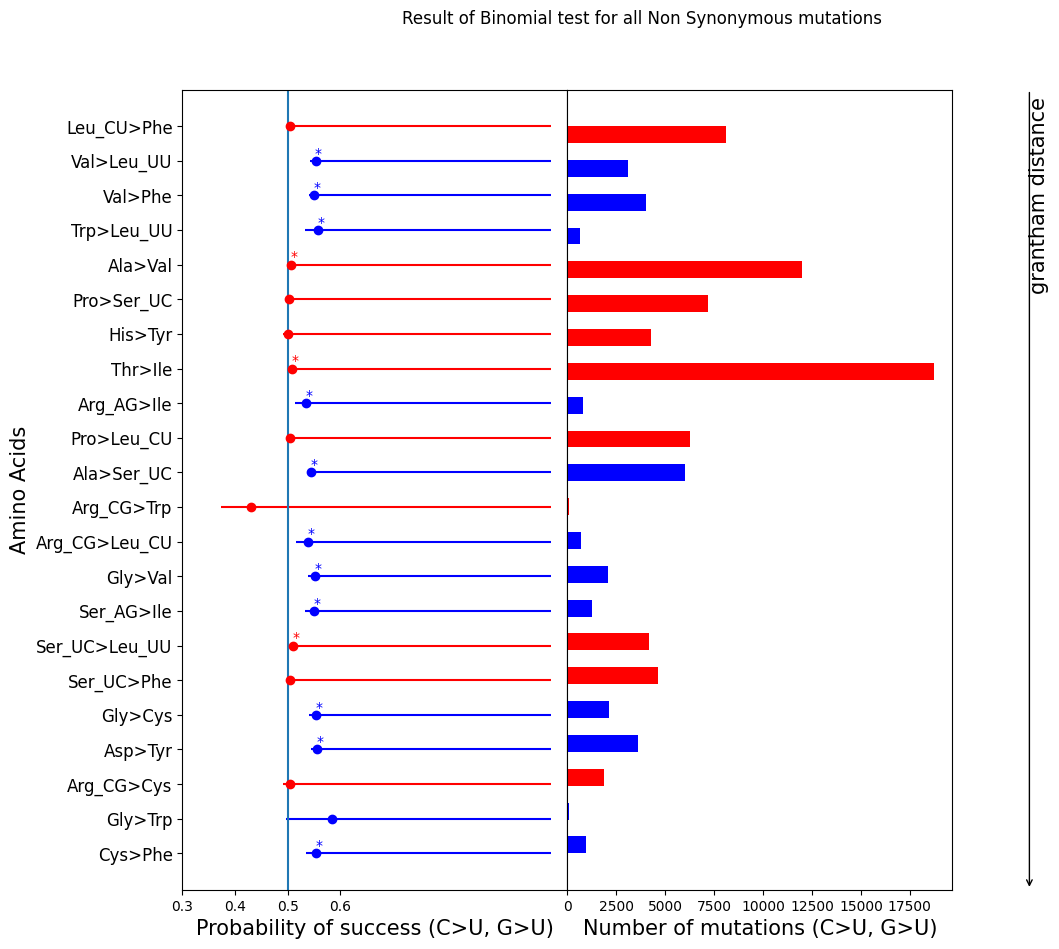

In [221]:
fig, ax = plt.subplots(1,2,figsize=(11,10))
min_error = list(aa_mut_mut_spec['prob_success'] - aa_mut_mut_spec['cilow'])
max_error = list(aa_mut_mut_spec['cihigh'] - aa_mut_mut_spec['prob_success'])
error = []
for i in range(len(min_error)):
    error.append([min_error[i], max_error[i]])
error = np.array(error)
aa_mut_mut_spec['color'] = ''
aa_mut_mut_spec.loc[aa_mut_mut_spec['Mut']=='C>U', 'color'] = 'red'
aa_mut_mut_spec.loc[aa_mut_mut_spec['Mut']=='G>U', 'color'] = 'blue'

for i in range(len(aa_mut_mut_spec['color'])):
    er = ax[0].errorbar(aa_mut_mut_spec['prob_success'][i], i, xerr=error[i].reshape(2, -1), marker="o", linestyle="none", color=aa_mut_mut_spec['color'][i])

ax[0].set_yticks(np.arange(len(aa_mut_mut_spec['Aa_Mut'])))
ax[0].set_yticklabels(aa_mut_mut_spec['Aa_Mut'], fontsize=12)

ax[0].set_xlabel('Probability of success (C>U, G>U)', size=15)
ax[0].set_ylabel('Amino Acids', size=15)
# ax.text(5.5,26, 'Odds_ratio with CI 95%')
# ax.text(7,26, 'p_value')
# ax.text(8,26, 'Aa status')

i=0
aa_mut_mut_spec.loc[aa_mut_mut_spec['aster'].isna(),'aster'] = ''
for index, row in aa_mut_mut_spec.iterrows():
    if aa_mut_mut_spec['Mut'][index] == 'C>U':
        ax[0].text(aa_mut_mut_spec['prob_success'][index]-0.001, i+0.1, aa_mut_mut_spec['aster'][index], color='red')
    elif aa_mut_mut_spec['Mut'][index] == 'G>U':
        ax[0].text(aa_mut_mut_spec['prob_success'][index]-0.001, i+0.1, aa_mut_mut_spec['aster'][index], color='blue')
    i+=1
#     if aa_statistics_fisher['p_value'][index] < 0.05:
#         ax.text(5.5,i, aa_statistics_fisher['odds_ratio_with_CI'][index], color='red')
#         ax.text(7,i, round(aa_statistics_fisher['p_value'][index],4), color='red')
#         ax.text(8,i, aa_statistics_fisher['aa_status'][index], color='red')
#     else:
#         ax.text(5.5,i, aa_statistics_fisher['odds_ratio_with_CI'][index])
#         ax.text(7,i, round(aa_statistics_fisher['p_value'][index],4))
#         ax.text(8,i, aa_statistics_fisher['aa_status'][index])
#     i = i+1
#  besides ORF1ab or in ORF1ab
ax[0].axvline(x=0.5)
ax[0].get_xaxis().set_ticks([0.30, 0.40, 0.50, 0.60])

ax[1].barh(y=aa_mut_mut_spec['Aa_Mut'], width=aa_mut_mut_spec['Aa_Mut_count'], height = 0.5, color=aa_mut_mut_spec['color'])
#ax[1].barh(y=aa_mut_mut_spec['Aa_Mut'], width=aa_mut_mut_spec['Anti_Aa_Mut_count'], left = aa_mut_mut_spec['Aa_Mut_count'], height = 0.5, color='green')
ax[1].get_yaxis().set_ticks([])
ax[1].set_xlabel('Number of mutations (C>U, G>U)', size=15)
plt.subplots_adjust(left=0.3,
                    bottom=0.1, 
                    right=1.0, 
                    top=0.9, 
                    wspace=0, 
                    hspace=0.4)
fig.suptitle('Result of Binomial test for all Non Synonymous mutations', horizontalalignment='left')
ax[1].annotate('', xy=(1.2, 1), xycoords='axes fraction', xytext=(1.2, 0), 
            arrowprops=dict(arrowstyle="<-", color='black'))
plt.text(1.07, 0.7, 'grantham distance', fontsize=15, rotation=90, transform=plt.gcf().transFigure)
plt.show()
fig.savefig('../figures/binom_test_all.pdf', dpi=300, bbox_inches = 'tight')